<h1>Spatial Analysis</h1>

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import geoplot
from shapely.geometry import Polygon
#import h3
#import h3pandas
import folium

ModuleNotFoundError: No module named 'geoplot'

In [3]:
file_path = "./data/prepared/"

taxi_weather = pd.read_csv(f"{file_path}taxi_weather.csv", parse_dates=["start_time", "end_time"])

In [4]:
taxi_weather.head(8)

,trip_id,taxi_id,start_time,end_time,minutes,miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location,temperature,wind_speed,precip,condition
0,bcfa19f2539021c054809d4c3993d226996ae095,368ce5511598af2cc07efdb68067d381174fdac1d47a28...,2022-01-01,2022-01-01 00:00:00,2.53,0.10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,33,21.0,0.0,Light Snow / Windy
1,2aba69ff015f9ea8e7bff43cab7eddb228f34a12,449fa4909552757130d09d98ebc7770e2dd94579036b0e...,2022-01-01,2022-01-01 00:30:00,39.33,17.44,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),33,21.0,0.0,Light Snow / Windy
2,54d812a0b88f8f9707825261014b3563a0a60ace,f98ae5e71fdda8806710af321dce58002146886c013f41...,2022-01-01,2022-01-01 00:00:00,8.93,4.83,NaN,NaN,28.0,22.0,...,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.922761,-87.699155,POINT (-87.6991553432 41.9227606205),33,21.0,0.0,Light Snow / Windy
3,040caea96573c5743668b138011bc157c7825e86,b9a58663518c48b09e83f462ca25ee0d702a2e4bc12199...,2022-01-01,2022-01-01 00:15:00,20.93,13.29,NaN,NaN,76.0,NaN,...,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN,33,21.0,0.0,Light Snow / Windy
4,0f0c856e620e6b4dfd2bb1e921d966dd179eeca1,b21050ab3ad3d0972fd6378f6bf4d0251a8a7af42e6e0e...,2022-01-01,2022-01-01 00:00:00,0.55,0.17,NaN,NaN,3.0,3.0,...,41.965812,-87.655879,POINT (-87.6558787862 41.96581197),41.965812,-87.655879,POINT (-87.6558787862 41.96581197),33,21.0,0.0,Light Snow / Windy
5,10de74ba327b09fc932ee8d4f8eb8b8b9aba92bb,86b07dc8beb256766f2025da2b99b77345074852eabbdf...,2022-01-01,2022-01-01 00:00:00,11.83,3.12,NaN,NaN,7.0,3.0,...,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.965812,-87.655879,POINT (-87.6558787862 41.96581197),33,21.0,0.0,Light Snow / Windy
6,1fdd5fd19aa47a9b2338b922bd52647941339326,b797b5aa67c2564edc5b5fc215486a64385357df81d1de...,2022-01-01,2022-01-01 00:30:00,31.00,14.40,NaN,NaN,76.0,NaN,...,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN,33,21.0,0.0,Light Snow / Windy
7,3f11e5abdb93e75abfb97bb9c27d166ebcf0abd4,c9867d006415cbc16529555f98cdeb44cb53aeaf1d9ae7...,2022-01-01,2022-01-01 00:00:00,5.00,1.40,NaN,NaN,33.0,33.0,...,41.857184,-87.620335,POINT (-87.6203346241 41.8571838585),41.857184,-87.620335,POINT (-87.6203346241 41.8571838585),33,21.0,0.0,Light Snow / Windy


<p>About the data: </p>
<p>https://www.lib.uchicago.edu/e/collections/maps/censusinfo.html</p>
<p>https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew#column-menu</p>

<h3>Short inspection of the data</h3>

In [7]:
taxi_weather.describe()

,minutes,miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,temperature,wind_speed,precip
count,5.389590e+06,5.389590e+06,2.188866e+06,2.257301e+06,4.947053e+06,4.862773e+06,5.389590e+06,5.389590e+06,5.389590e+06,5.389590e+06,5.389590e+06,4.947523e+06,4.947523e+06,4.895375e+06,4.895375e+06,5.389590e+06,5.389590e+06,5389590.0
mean,2.087711e+01,7.149707e+00,1.703147e+10,1.703141e+10,3.324103e+01,2.572172e+01,2.260318e+01,2.898869e+00,1.975705e-02,2.174806e+00,2.787174e+01,4.190016e+01,-8.769124e+01,4.189401e+01,-8.766136e+01,5.709702e+01,1.031992e+01,0.0
std,1.589194e+01,7.101044e+00,3.704624e+05,3.426828e+05,2.556360e+01,2.076194e+01,2.578454e+01,4.114585e+00,7.379413e+00,1.893562e+01,3.673720e+01,6.128839e-02,1.076572e-01,5.660331e-02,7.213222e-02,2.096082e+01,5.216390e+00,0.0
min,5.500000e-01,1.000000e-01,1.703101e+10,1.703101e+10,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.165192e+01,-8.791362e+01,4.166014e+01,-8.791362e+01,-9.000000e+00,0.000000e+00,0.0
25%,9.000000e+00,1.320000e+00,1.703108e+10,1.703108e+10,8.000000e+00,8.000000e+00,8.750000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.075000e+01,4.187887e+01,-8.769501e+01,4.187887e+01,-8.766352e+01,4.000000e+01,7.000000e+00,0.0
50%,1.633000e+01,3.760000e+00,1.703132e+10,1.703132e+10,3.200000e+01,2.800000e+01,1.625000e+01,1.040000e+00,0.000000e+00,0.000000e+00,1.900000e+01,4.189503e+01,-8.763331e+01,4.189251e+01,-8.763331e+01,6.000000e+01,9.000000e+00,0.0
75%,2.885000e+01,1.240000e+01,1.703184e+10,1.703184e+10,5.300000e+01,3.200000e+01,3.486000e+01,4.000000e+00,0.000000e+00,4.000000e+00,4.375000e+01,4.194423e+01,-8.762519e+01,4.192269e+01,-8.762519e+01,7.500000e+01,1.400000e+01,0.0
max,2.114300e+02,8.685000e+01,1.703198e+10,1.703198e+10,7.700000e+01,7.700000e+01,9.628630e+03,2.100000e+02,6.666660e+03,8.888880e+03,9.822350e+03,4.201605e+01,-8.753071e+01,4.202122e+01,-8.753139e+01,1.010000e+02,3.700000e+01,0.0


In [10]:
taxi_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5389590 entries, 0 to 5389589
Data columns (total 27 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   trip_id                     object        
 1   taxi_id                     object        
 2   start_time                  datetime64[ns]
 3   end_time                    datetime64[ns]
 4   minutes                     float64       
 5   miles                       float64       
 6   pickup_census_tract         float64       
 7   dropoff_census_tract        float64       
 8   pickup_community_area       float64       
 9   dropoff_community_area      float64       
 10  fare                        float64       
 11  tips                        float64       
 12  tolls                       float64       
 13  extras                      float64       
 14  total                       float64       
 15  payment_type                object        
 16  company           

In [13]:
taxi_weather.isna().sum()

trip_id                             0
taxi_id                             0
start_time                          0
end_time                            0
minutes                             0
miles                               0
pickup_census_tract           3200724
dropoff_census_tract          3132289
pickup_community_area          442537
dropoff_community_area         526817
fare                                0
tips                                0
tolls                               0
extras                              0
total                               0
payment_type                        0
company                             0
pickup_centroid_latitude       442067
pickup_centroid_longitude      442067
pickup_centroid_location       442067
dropoff_centroid_latitude      494215
dropoff_centroid_longitude     494215
dropoff_centroid_location      494215
temperature                         0
wind_speed                          0
precip                              0
condition   

<h3>Preparing the data for visualization</h3>

<p>Since we already have data on distance and duration of trips, we can look at the speed at which the trip destination is reached (in miles / hour)</p>

In [5]:
def get_speed_to_location(x):
    minutes = x.minutes
    return (((x.miles * 1000) / (minutes * 60)) * 3.6) if minutes > 0 else 0
taxi_weather["speed_to_location"] = taxi_weather.apply(lambda x: get_speed_to_location(x), axis=1)

In [6]:
# Taking a look at the dataframe to see if calculating the speed worked fine

taxi_weather

,trip_id,taxi_id,start_time,end_time,minutes,miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location,temperature,wind_speed,precip,condition,speed_to_location
0,bcfa19f2539021c054809d4c3993d226996ae095,368ce5511598af2cc07efdb68067d381174fdac1d47a28...,2022-01-01 00:00:00,2022-01-01 00:00:00,2.53,0.10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33,21.0,0.0,Light Snow / Windy,2.371542
1,2aba69ff015f9ea8e7bff43cab7eddb228f34a12,449fa4909552757130d09d98ebc7770e2dd94579036b0e...,2022-01-01 00:00:00,2022-01-01 00:30:00,39.33,17.44,NaN,NaN,NaN,8.0,...,NaN,NaN,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),33,21.0,0.0,Light Snow / Windy,26.605645
2,54d812a0b88f8f9707825261014b3563a0a60ace,f98ae5e71fdda8806710af321dce58002146886c013f41...,2022-01-01 00:00:00,2022-01-01 00:00:00,8.93,4.83,NaN,NaN,28.0,22.0,...,-87.663518,POINT (-87.6635175498 41.874005383),41.922761,-87.699155,POINT (-87.6991553432 41.9227606205),33,21.0,0.0,Light Snow / Windy,32.452408
3,040caea96573c5743668b138011bc157c7825e86,b9a58663518c48b09e83f462ca25ee0d702a2e4bc12199...,2022-01-01 00:00:00,2022-01-01 00:15:00,20.93,13.29,NaN,NaN,76.0,NaN,...,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN,33,21.0,0.0,Light Snow / Windy,38.098423
4,0f0c856e620e6b4dfd2bb1e921d966dd179eeca1,b21050ab3ad3d0972fd6378f6bf4d0251a8a7af42e6e0e...,2022-01-01 00:00:00,2022-01-01 00:00:00,0.55,0.17,NaN,NaN,3.0,3.0,...,-87.655879,POINT (-87.6558787862 41.96581197),41.965812,-87.655879,POINT (-87.6558787862 41.96581197),33,21.0,0.0,Light Snow / Windy,18.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5389585,ae3d90108a96c6492a6255f7fc6b85c8e7e0d12c,2eda36427e0a5394e90d77488294cd75e2fd87f04acb02...,2022-12-31 23:45:00,2022-12-31 23:45:00,3.27,0.57,NaN,NaN,6.0,6.0,...,-87.655998,POINT (-87.6559981815 41.9442266014),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),37,6.0,0.0,Cloudy,10.458716
5389586,ad84bc072bb580f059a1c2b71a808b21e28a28fb,ef63da921ed08ceb44e590dbb76b0505f1300167c24876...,2022-12-31 23:45:00,2022-12-31 23:45:00,5.90,0.85,1.703184e+10,1.703132e+10,32.0,32.0,...,-87.632746,POINT (-87.6327464887 41.8809944707),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),37,6.0,0.0,Cloudy,8.644068
5389587,b13dcd7ede0551d30944feab189891fdca8873b6,6201cd8256e26b0ef547ca53db3aaac4d23fc7d02e4c9f...,2022-12-31 23:45:00,2022-12-31 23:45:00,1.72,0.31,NaN,NaN,3.0,3.0,...,-87.655879,POINT (-87.6558787862 41.96581197),41.965812,-87.655879,POINT (-87.6558787862 41.96581197),37,6.0,0.0,Cloudy,10.813953
5389588,d35a54c3d20c5275718151191d6cbd3624640931,e87c704a9b1b4c7e9036508cc65d110d38bb2f8d12414b...,2022-12-31 23:45:00,2022-12-31 23:45:00,8.33,1.58,NaN,NaN,7.0,7.0,...,-87.649489,POINT (-87.6494887289 41.9226862843),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),37,6.0,0.0,Cloudy,11.380552


<h2>Plotting relevant metrics</h2>
<h3>Trip Distance</h3>
<p>We will take a look at how far taxi trips usually go</p>

<AxesSubplot:xlabel='miles', ylabel='Count'>

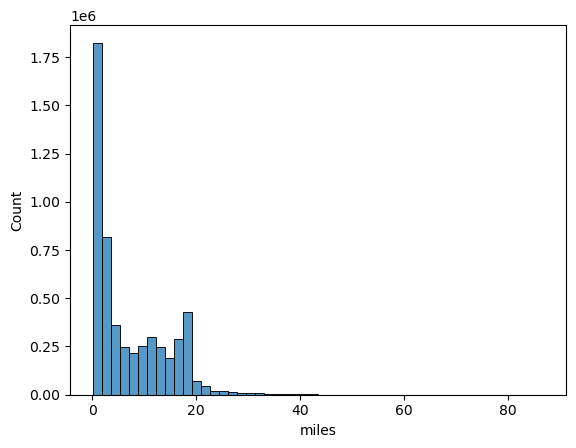

In [9]:
# Plotting the trip distance
sns.histplot(data=taxi_weather, x="miles", bins=50)

<p>We see that the majority of trips are over short distances, with the peak being under one mile. There are rarely trips above 20 miles in distance.</P>

<h3>Trip distance with regards to pickup community area</h3>

<AxesSubplot:xlabel='miles', ylabel='Count'>

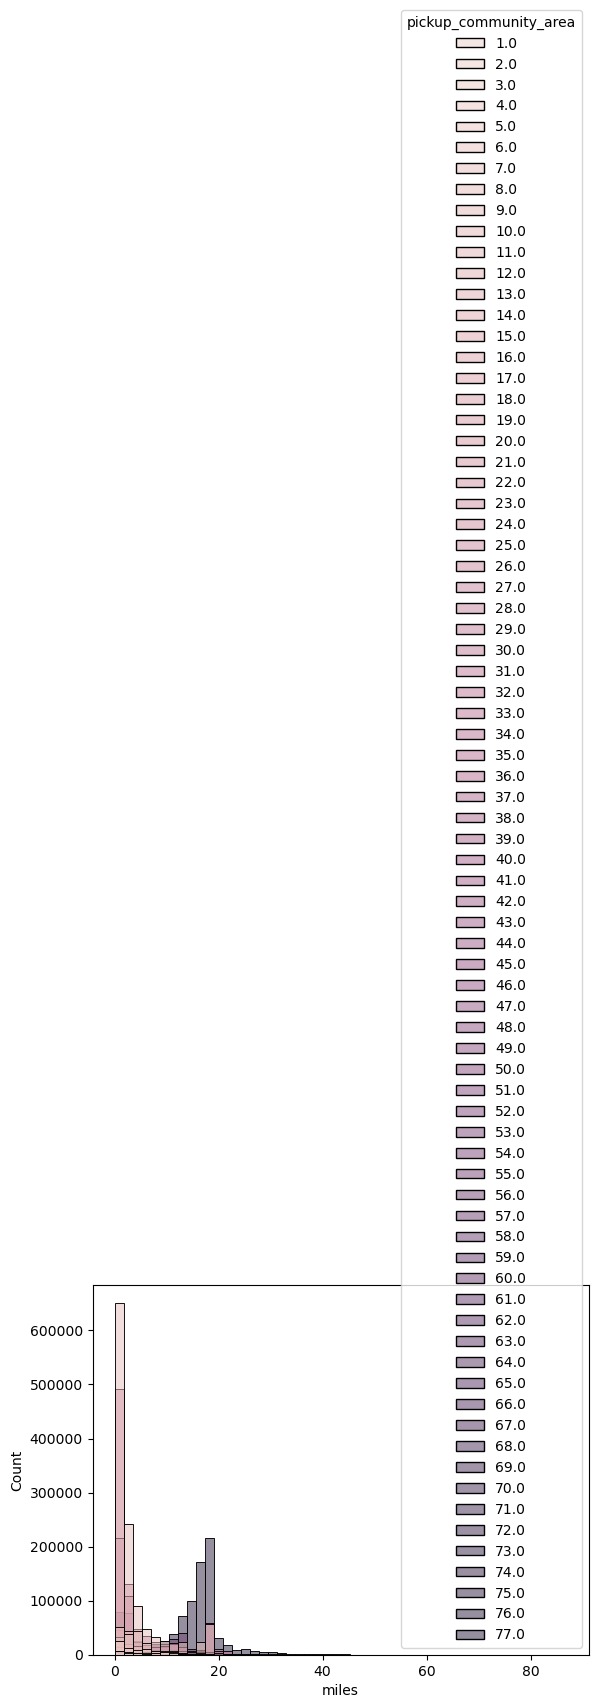

In [10]:
# Taking a look at distance distribution with consideration of pickup_community_area 

sns.histplot(data=taxi_weather, x="miles", hue="pickup_community_area", bins=50)

In [13]:
# Checking how many community areas are there in the data frame
taxi_weather['pickup_community_area'].nunique()


77

In [14]:
# Also checking for drop off areas
taxi_weather['dropoff_community_area'].nunique()

77

<p>Since the number of community areas is quite high, a different type of visualization might be needed to extraxt relevant information</p>
<p>However, we will zoom in a bit in order to get a better impression on the trip variation among the different community areas.</p>

<AxesSubplot:xlabel='miles', ylabel='Count'>

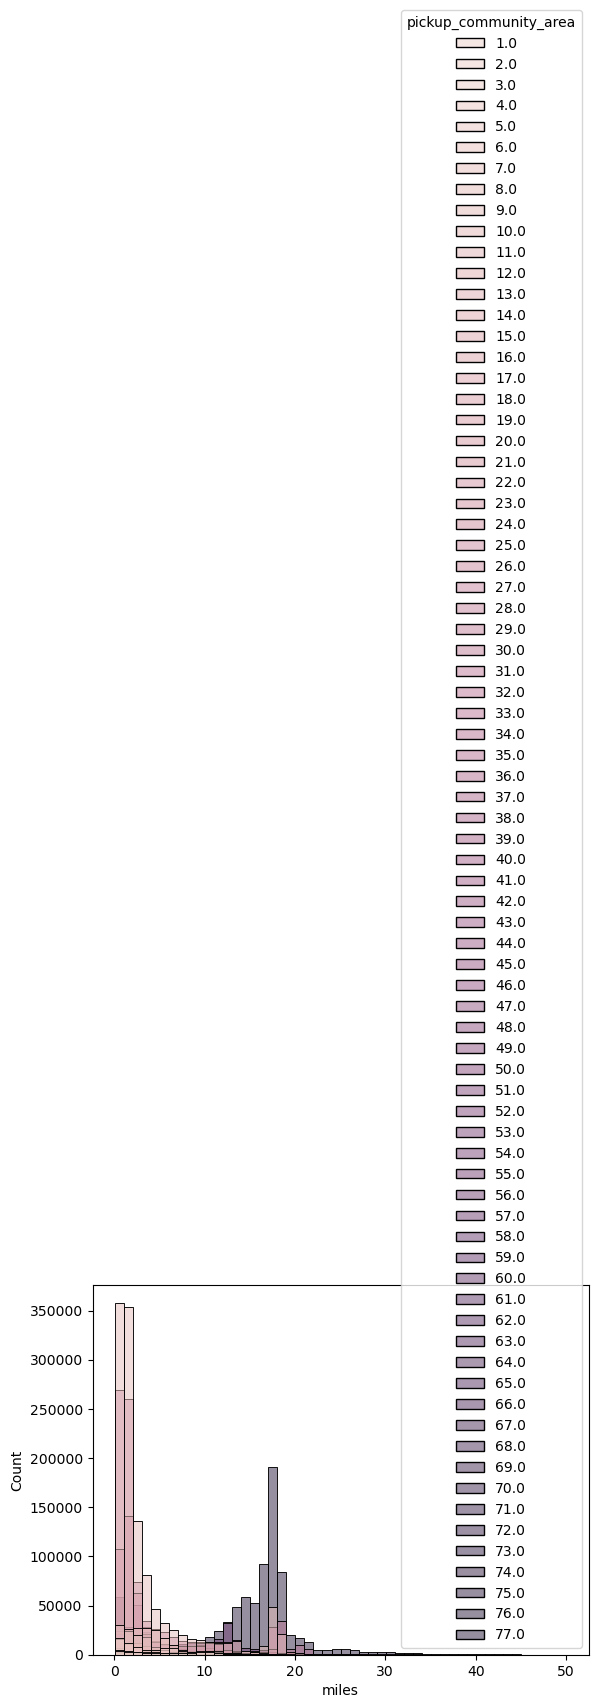

In [16]:
# As we've seen above, there are no trips longer than roughly 50 miles
# So we will zoom in on trips shorter than 50 miles to get a better impression

sns.histplot(data=taxi_weather[taxi_weather["miles"] < 50], x="miles", hue="pickup_community_area", bins=50)

<p>What we can see above is that shorter trips are being started in the community areas with lower codes, while longer trips are mostly taken from community areas with higher codes.</p>

<h3>Speed to Destination</h3>
<p>Now, we will plot the speed of the trips</p>

<AxesSubplot:xlabel='speed_to_location', ylabel='Count'>

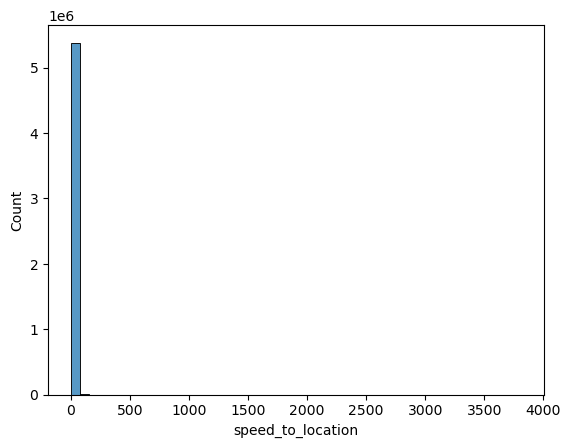

In [17]:
sns.histplot(data=taxi_weather, x="speed_to_location", bins=50)

<AxesSubplot:xlabel='speed_to_location', ylabel='Count'>

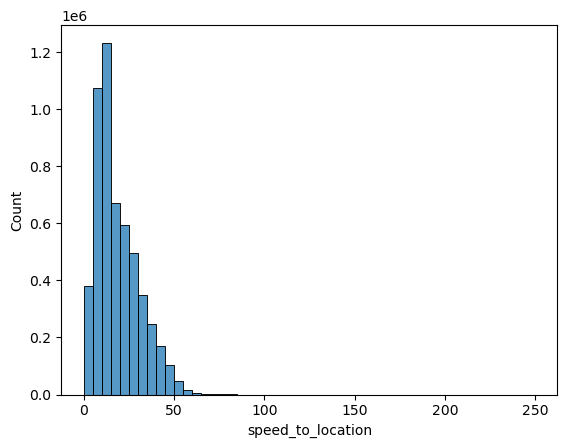

In [18]:
# Zooming in on speed lower than 250 miles / hour
sns.histplot(data=taxi_weather[taxi_weather["speed_to_location"] < 250], x="speed_to_location", bins=50)

<AxesSubplot:xlabel='speed_to_location', ylabel='Count'>

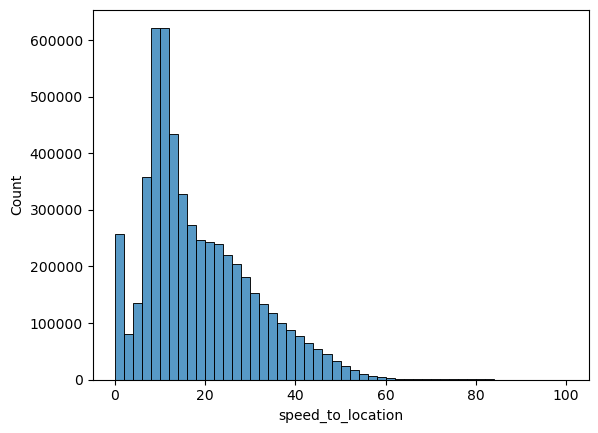

In [21]:
# Zooming in on speed lower than 100 miles / hour
sns.histplot(data=taxi_weather[taxi_weather["speed_to_location"] < 100], x="speed_to_location", bins=50)

<h2>Geographic Visualizations</h2>

In [24]:
# Importing geojason file of Chicago

file_path2 = "./data/input/"
chicago_geojson = gpd.read_file(f"{file_path2}chicago.geojson")
chicago_geojson

,name,cartodb_id,created_at,updated_at,geometry
0,Grand Boulevard,1,2013-02-02 23:59:44.022000+00:00,2013-02-02 23:59:44.295000+00:00,"MULTIPOLYGON (((-87.60671 41.81681, -87.60671 ..."
1,Printers Row,2,2013-02-02 23:59:44.022000+00:00,2013-02-02 23:59:44.295000+00:00,"MULTIPOLYGON (((-87.62761 41.87437, -87.62759 ..."
2,United Center,3,2013-02-02 23:59:44.022000+00:00,2013-02-02 23:59:44.295000+00:00,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
3,Sheffield & DePaul,4,2013-02-02 23:59:44.022000+00:00,2013-02-02 23:59:44.295000+00:00,"MULTIPOLYGON (((-87.65833 41.92166, -87.65835 ..."
4,Humboldt Park,5,2013-02-02 23:59:44.022000+00:00,2013-02-02 23:59:44.295000+00:00,"MULTIPOLYGON (((-87.74060 41.88782, -87.74060 ..."
...,...,...,...,...,...
93,Ukrainian Village,94,2013-02-02 23:59:44.022000+00:00,2013-02-02 23:59:44.295000+00:00,"MULTIPOLYGON (((-87.67705 41.89591, -87.67748 ..."
94,Old Town,95,2013-02-02 23:59:44.022000+00:00,2013-02-02 23:59:44.295000+00:00,"MULTIPOLYGON (((-87.63612 41.91847, -87.63569 ..."
95,Gold Coast,96,2013-02-02 23:59:44.022000+00:00,2013-02-02 23:59:44.295000+00:00,"MULTIPOLYGON (((-87.62646 41.91147, -87.62641 ..."
96,Boystown,97,2013-02-02 23:59:44.022000+00:00,2013-02-02 23:59:44.295000+00:00,"MULTIPOLYGON (((-87.64879 41.93999, -87.64927 ..."


In [25]:
# Visualizing map of Chicago

c_map = folium.Map(location=[41.863, -87.5], zoom_start=10)

folium.Choropleth(
    geo_data=chicago_geojson,
    name="choropleth",
    fill_color="YlGnBu",
    fill_opacity=0.3,
    line_opacity=0.2,
).add_to(c_map)

folium.LayerControl().add_to(c_map)

c_map

TypeError: Object of type Timestamp is not JSON serializable

<h2>To Do</h2>
<p>Analyse demand for different geo resolutions:</p>
<p>1. High demand pick up census tracts</p>
<p>2. High demand pick up community areas</p>
<p>3. High demand pick up hexagon diameters</p>
<p>Furhter, consideration of different temporal bin sizes -> hours of day, days of week, months of year</p>